RFM: Recency - Frequency - Monetary Value.
- Low value: Customers who are less active than others, not very frequent vistor, maybe negative revenue
- Mid value: Middle of something. Often use platform, fairly frequent, generate moderate revenue
- High value: High revenue, frequency and high activity.
Segmentation users base on these types of 
1. Recency: based on the last active order -> Clustering
2. Frequency: based on total number orders for each customer -> Clustering
3. Revenue: based on total revenue -> Clustering

# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
olist_customers = pd.read_csv("/Users/phuongnguyen/Documents/Code Github/mlops-ml-ecommerce-customers/sample_files/olist_dataset/olist_customers_dataset.csv")
olist_orders = pd.read_csv("/Users/phuongnguyen/Documents/Code Github/mlops-ml-ecommerce-customers/sample_files/olist_dataset/olist_orders_dataset.csv")
olist_orders_payment = pd.read_csv("/Users/phuongnguyen/Documents/Code Github/mlops-ml-ecommerce-customers/sample_files/olist_dataset/olist_order_payments_dataset.csv")

In [3]:
olist_orders_payment.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [4]:
olist_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# Recency and User Clustering based on Recency

In [5]:
#Get the maximum date of order_purchase_timestamp to get the latest date of the order dataset
max_date = olist_orders['order_purchase_timestamp'].max()
max_date_timestamp = pd.to_datetime(max_date)
print(max_date)

2018-10-17 17:30:18


In [6]:
olist_orders.dtypes


order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [7]:
olist_orders['purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])

In [8]:
olist_orders['last_order'] = max_date_timestamp - olist_orders['purchase_timestamp']
olist_orders['last_order_day'] = olist_orders['last_order'].dt.days

In [9]:
olist_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_timestamp,last_order,last_order_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,380 days 06:33:45,380
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,84 days 20:48:41,84
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,70 days 08:51:29,70
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,332 days 22:02:12,332
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,245 days 20:11:39,245


In [10]:
olist_orders_recency = olist_orders[['customer_id', 'last_order_day']]

In [11]:
olist_orders_recency

,customer_id,last_order_day
0,9ef432eb6251297304e76186b10a928d,380
1,b0830fb4747a6c6d20dea0b8c802d7ef,84
2,41ce2a54c0b03bf3443c3d931a367089,70
3,f88197465ea7920adcdbec7375364d82,332
4,8ab97904e6daea8866dbdbc4fb7aad2c,245
...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,587
99437,1fca14ff2861355f6e5f14306ff977a7,253
99438,1aa71eb042121263aafbe80c1b562c9c,416
99439,b331b74b18dc79bcdf6532d51e1637c1,281


In [12]:
import matplotlib.pyplot as plt

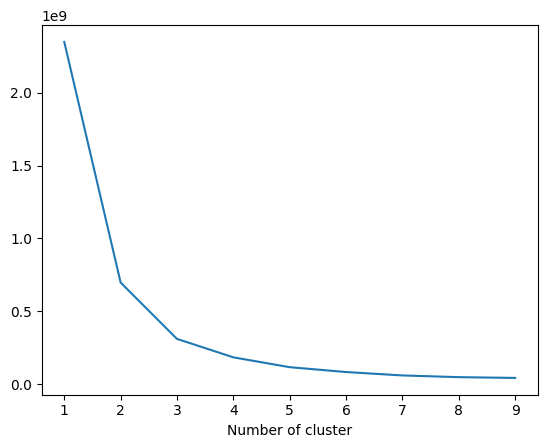

In [13]:
from sklearn.cluster import KMeans

sse = {}
olist_recency = olist_orders_recency[['last_order_day']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(olist_recency)
    olist_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [14]:
#Build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters =4)
olist_orders_recency['recency_cluster'] = kmeans.fit_predict(olist_orders_recency[['last_order_day']])


/var/folders/yt/4vlc63d57rz84q0w40rbc23w0000gn/T/ipykernel_2901/4210488046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_orders_recency['recency_cluster'] = kmeans.fit_predict(olist_orders_recency[['last_order_day']])


In [15]:
olist_orders_recency.head(10)

,customer_id,last_order_day,recency_cluster
0,9ef432eb6251297304e76186b10a928d,380,2
1,b0830fb4747a6c6d20dea0b8c802d7ef,84,3
2,41ce2a54c0b03bf3443c3d931a367089,70,3
3,f88197465ea7920adcdbec7375364d82,332,0
4,8ab97904e6daea8866dbdbc4fb7aad2c,245,0
5,503740e9ca751ccdda7ba28e9ab8f608,464,2
6,ed0271e0b7da060a393796590e7b737a,554,1
7,9bdf08b4b3b52b5526ff42d37d47f222,519,1
8,f54a9f0e6b351c431402b8461ea51999,631,1
9,31ad1d1b63eb9962463f764d4e6e0c9d,445,2


In [16]:
olist_orders_recency.groupby('recency_cluster')['last_order_day'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,33058.0,264.822675,41.926568,194.0,229.0,264.0,306.0,333.0
1,14462.0,552.224519,52.815379,478.0,511.0,542.0,587.0,772.0
2,20506.0,402.225397,41.527388,334.0,366.0,400.0,438.0,477.0
3,31415.0,122.207608,42.302540,0.0,83.0,122.0,161.0,193.0


In [17]:
#reorder clusters so that cluster 3 is better than cluster 1 means that with cluster 1: the mean is longer than cluster 3
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [18]:
olist_orders_recency.head(5)

,customer_id,last_order_day,recency_cluster
0,9ef432eb6251297304e76186b10a928d,380,2
1,b0830fb4747a6c6d20dea0b8c802d7ef,84,3
2,41ce2a54c0b03bf3443c3d931a367089,70,3
3,f88197465ea7920adcdbec7375364d82,332,0
4,8ab97904e6daea8866dbdbc4fb7aad2c,245,0


In [19]:
olist_orders_recency_ordered = order_cluster('recency_cluster', 'last_order_day', olist_orders_recency, False)

In [20]:
olist_orders_recency_ordered.groupby('recency_cluster')['last_order_day'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,14462.0,552.224519,52.815379,478.0,511.0,542.0,587.0,772.0
1,20506.0,402.225397,41.527388,334.0,366.0,400.0,438.0,477.0
2,33058.0,264.822675,41.926568,194.0,229.0,264.0,306.0,333.0
3,31415.0,122.207608,42.302540,0.0,83.0,122.0,161.0,193.0


# Frequency and User Clustering based on Frequency

In [21]:
total_orders = (olist_orders.groupby('customer_id').size().reset_index())
total_orders.columns = ['customer_id', 'total_order']

print(total_orders)


                            customer_id  total_order
0      00012a2ce6f8dcda20d059ce98491703            1
1      000161a058600d5901f007fab4c27140            1
2      0001fd6190edaaf884bcaf3d49edf079            1
3      0002414f95344307404f0ace7a26f1d5            1
4      000379cdec625522490c315e70c7a9fb            1
...                                 ...          ...
99436  fffecc9f79fd8c764f843e9951b11341            1
99437  fffeda5b6d849fbd39689bb92087f431            1
99438  ffff42319e9b2d713724ae527742af25            1
99439  ffffa3172527f765de70084a7e53aae8            1
99440  ffffe8b65bbe3087b653a978c870db99            1

[99441 rows x 2 columns]


In [22]:
total_orders.describe()

,total_order
count,99441.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


# Revenue and User Clustering based on Revenue

In [23]:
orders_payment_bycus = pd.merge(olist_orders_payment, olist_orders, on='order_id')

In [24]:
orders_payment_bycus.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_timestamp,last_order,last_order_day
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,2018-04-25 22:01:49,174 days 19:28:29,174
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,2018-06-26 11:01:38,113 days 06:28:40,113
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,2017-12-12 11:19:55,309 days 06:10:23,309
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,2017-12-06 12:04:06,315 days 05:26:12,315
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,2018-05-21 13:59:17,149 days 03:31:01,149


In [25]:
olist_customers_revenue = orders_payment_bycus.groupby(['customer_id'], sort = True)['payment_value'].sum()


In [26]:
olist_customers_revenue = olist_customers_revenue.to_frame().reset_index()

In [27]:
print(type(olist_customers_revenue))

<class 'pandas.core.frame.DataFrame'>


In [28]:
olist_customers_revenue.columns = ['customer_id', 'revenue']

In [29]:
olist_customers_revenue.head(5)

,customer_id,revenue
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


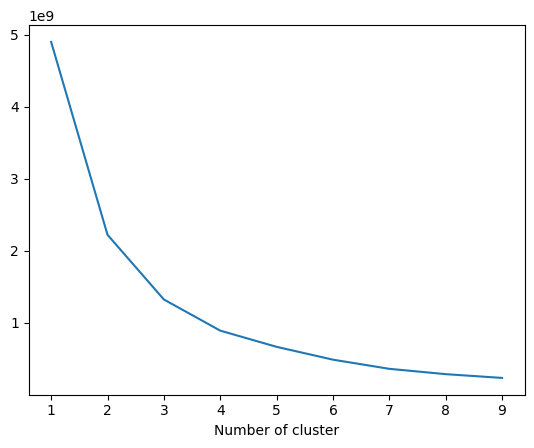

In [30]:
#clustering customer based on their revenue
from sklearn.cluster import KMeans

sse = {}
olist_revenue = olist_customers_revenue[['revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(olist_revenue)
    olist_revenue["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

Take 4 las the number of clusters

In [31]:
olist_revenue.head()

,revenue,clusters
0,114.74,6
1,67.41,1
2,195.42,0
3,179.35,0
4,107.01,6


In [32]:
#apply clustering
kmeans = KMeans(n_clusters=4)
olist_customers_revenue['revenuecluster'] = kmeans.fit_predict(olist_customers_revenue[['revenue']])


In [33]:
print(olist_customers_revenue)

                            customer_id  revenue  revenuecluster
0      00012a2ce6f8dcda20d059ce98491703   114.74               0
1      000161a058600d5901f007fab4c27140    67.41               0
2      0001fd6190edaaf884bcaf3d49edf079   195.42               3
3      0002414f95344307404f0ace7a26f1d5   179.35               0
4      000379cdec625522490c315e70c7a9fb   107.01               0
...                                 ...      ...             ...
99435  fffecc9f79fd8c764f843e9951b11341    81.36               0
99436  fffeda5b6d849fbd39689bb92087f431    63.13               0
99437  ffff42319e9b2d713724ae527742af25   214.13               3
99438  ffffa3172527f765de70084a7e53aae8    45.50               0
99439  ffffe8b65bbe3087b653a978c870db99    18.37               0

[99440 rows x 3 columns]


In [34]:
olist_customers_revenue.groupby('revenuecluster')['revenue'].describe()


,count,mean,std,min,25%,50%,75%,max
revenuecluster,,,,,,,,
0,77226.0,90.646529,44.546170,0.00,53.730,83.38,124.1175,189.79
1,3114.0,848.164117,246.157637,568.05,648.840,772.45,984.7875,1549.41
2,421.0,2253.804347,968.771364,1550.68,1755.210,2023.58,2338.4800,13664.08
3,18679.0,290.088794,91.015748,189.81,217.095,260.00,340.6950,568.00


In [35]:
#reorder clusters so that cluster 3 is better than cluster 1 means that with cluster 1: the mean (revenue) is higher than the mean (revenue) of cluster 3
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [36]:
olist_orders_revenue_ordered = order_cluster('revenuecluster', 'revenue', olist_customers_revenue, True)

In [37]:
olist_orders_revenue_ordered.groupby('revenuecluster')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
revenuecluster,,,,,,,,
0,77226.0,90.646529,44.546170,0.00,53.730,83.38,124.1175,189.79
1,18679.0,290.088794,91.015748,189.81,217.095,260.00,340.6950,568.00
2,3114.0,848.164117,246.157637,568.05,648.840,772.45,984.7875,1549.41
3,421.0,2253.804347,968.771364,1550.68,1755.210,2023.58,2338.4800,13664.08


# RFM (Recency - Frequency - Monetary/Revenue Value) Clustering

In [38]:
#Calculate overall score and use mean() to see details
order_rfm = pd.merge(olist_orders_recency_ordered, olist_orders_revenue_ordered, on = 'customer_id')
order_rfm.head(5)

,customer_id,last_order_day,recency_cluster,revenue,revenuecluster
0,9ef432eb6251297304e76186b10a928d,380,1,38.71,0
1,503740e9ca751ccdda7ba28e9ab8f608,464,1,175.26,0
2,31ad1d1b63eb9962463f764d4e6e0c9d,445,1,169.76,0
3,7711cf624183d843aafe81855097bc37,460,1,114.13,0
4,7f8c8b9c2ae27bf3300f670c3d478be8,356,1,92.97,0


In [39]:
order_rfm['rfm_score'] = order_rfm['recency_cluster'] + order_rfm['revenuecluster']

In [40]:
order_rfm.groupby('rfm_score')[['last_order_day', 'revenue']].mean()

,last_order_day,revenue
rfm_score,,
0,551.333690,88.523210
1,424.529835,119.469331
2,286.701753,127.587989
3,157.473225,154.783098
4,144.848176,380.877529
5,137.956960,968.556145
6,120.869565,2325.165093


rfm_score = 0 is our worst customer, low active, low revenue. rfm_score = 8 is our beloved customer, high active and high revenue

In [41]:
order_rfm.head(10)

,customer_id,last_order_day,recency_cluster,revenue,revenuecluster,rfm_score
0,9ef432eb6251297304e76186b10a928d,380,1,38.71,0,1
1,503740e9ca751ccdda7ba28e9ab8f608,464,1,175.26,0,1
2,31ad1d1b63eb9962463f764d4e6e0c9d,445,1,169.76,0,1
3,7711cf624183d843aafe81855097bc37,460,1,114.13,0,1
4,7f8c8b9c2ae27bf3300f670c3d478be8,356,1,92.97,0,1
5,d2b091571da224a1b36412c18bc3bbfe,394,1,118.86,0,1
6,456dc10730fbdba34615447ea195d643,433,1,313.19,1,2
7,295ae9b35379e077273387ff64354b6f,442,1,43.00,0,1
8,8644be24d48806bc3a88fd59fb47ceb1,439,1,95.67,0,1
9,7f2178c5d771e17f507d3c1637339298,433,1,130.56,0,1


In [42]:
#Segment user with Low-value, Mid-value, High-value
order_rfm['Segment'] = 'Low-Value'
order_rfm.loc[order_rfm['rfm_score']>1,'Segment'] = 'Mid-Value' 
order_rfm.loc[order_rfm['rfm_score']>4,'Segment'] = 'High-Value' 

# Customer Lifetime Value Prediction

In [43]:
orders_payment_bycus['purchase_timestamp'].describe()

count                           103886
mean     2017-12-29 21:48:47.671803648
min                2016-09-04 21:15:19
25%      2017-09-10 09:01:08.750000128
50%                2018-01-17 14:07:54
75%      2018-05-03 18:35:58.249999872
max                2018-10-17 17:30:18
Name: purchase_timestamp, dtype: object

In [44]:
#Calculate 6 months LTV for each customer (less than 180 days from last order day)
revenue_6m = orders_payment_bycus[orders_payment_bycus.last_order_day <= 180]

In [45]:
print(revenue_6m.describe())

       payment_sequential  payment_installments  payment_value  \
count        29444.000000          29444.000000   29444.000000   
mean             1.060624              2.762668     159.285056   
min              1.000000              0.000000       0.000000   
25%              1.000000              1.000000      58.280000   
50%              1.000000              1.000000     103.265000   
75%              1.000000              4.000000     174.962500   
max             14.000000             24.000000    7274.880000   
std              0.425425              2.587540     230.729721   

                  purchase_timestamp                   last_order  \
count                          29444                        29444   
mean   2018-06-23 16:18:51.971776768  116 days 01:11:26.028223066   
min              2018-04-19 17:33:04              0 days 00:00:00   
25%              2018-05-16 19:57:37             79 days 18:47:11   
50%              2018-06-23 23:37:24            115 days 17:

In [46]:
#Calculate 3 months LTV for each customer (less than 90 days from last order day)
revenue_3m = orders_payment_bycus[orders_payment_bycus.last_order_day <= 90]
print(revenue_3m.describe())

       payment_sequential  payment_installments  payment_value  \
count        10084.000000          10084.000000   10084.000000   
mean             1.043435              2.697937     156.048877   
min              1.000000              1.000000       0.000000   
25%              1.000000              1.000000      57.990000   
50%              1.000000              1.000000      99.435000   
75%              1.000000              4.000000     173.027500   
max              7.000000             20.000000    6922.210000   
std              0.298925              2.553949     229.244493   

                  purchase_timestamp                  last_order  \
count                          10084                       10084   
mean   2018-08-06 14:44:55.736215808  72 days 02:45:22.263784212   
min              2018-07-18 17:35:49             0 days 00:00:00   
25%    2018-07-28 21:50:46.249999872     63 days 08:36:04.250000   
50%              2018-08-06 15:06:19            72 days 02:23:59 

In [47]:
#calculate revenue and create a new dataframe for it
revenue_3m_bycus = revenue_3m.groupby(['customer_id'], sort = True)['payment_value'].sum()
#to_dataframe
revenue_3m_bycus = revenue_3m_bycus.to_frame().reset_index()
print(type(revenue_3m_bycus))


<class 'pandas.core.frame.DataFrame'>


In [48]:
revenue_3m_bycus.columns = ['customer_id', 'm3_revenue']
revenue_3m_bycus.head()

,customer_id,m3_revenue
0,000598caf2ef4117407665ac33275130,1255.71
1,001df1ee5c36767aa607001ab1a13a06,42.86
2,002554bdf9eb99618d8189c3a89fdd52,244.08
3,0026955706fd4e2fa997f3f4c18d485a,121.90
4,002905287304e28c0218389269b4759b,31.70


In [49]:
#calculate revenue and create a new dataframe for it
revenue_6m_bycus = revenue_6m.groupby(['customer_id'], sort = True)['payment_value'].sum()
#to_dataframe
revenue_6m_bycus = revenue_6m_bycus.to_frame().reset_index()
print(type(revenue_6m_bycus))


<class 'pandas.core.frame.DataFrame'>


In [50]:
revenue_6m_bycus.columns = ['customer_id', 'm6_revenue']
revenue_6m_bycus.head()

,customer_id,m6_revenue
0,000598caf2ef4117407665ac33275130,1255.71
1,0005aefbb696d34b3424dccd0a0e9fd0,147.33
2,001051abfcfdbed9f87b4266213a5df1,65.20
3,0013cd8e350a7cc76873441e431dd5ee,92.60
4,0015bc9fd2d5395446143e8b215d7c75,132.19


In [51]:
import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [52]:
#plot LTV histogram
plot_3m_data = [
    go.Histogram(
        x=revenue_3m_bycus['m3_revenue']
    )
]

plot_layout = go.Layout(
        title='3m revenue'
    )
fig = go.Figure(data=plot_3m_data, layout=plot_layout)
pyoff.iplot(fig)

In [53]:
#plot LTV histogram
plot_6m_data = [
    go.Histogram(
        x=revenue_6m_bycus['m6_revenue']
    )
]

plot_layout = go.Layout(
        title='6m revenue'
    )
fig = go.Figure(data=plot_6m_data, layout=plot_layout)
pyoff.iplot(fig)

# Correlation between LTV and the features set we have

In [54]:
# Merge user 6 months revenue dataframe with order_rfm to see correlation
customer_rfm_6m = pd.merge(order_rfm, revenue_6m_bycus, on = 'customer_id', how = 'left')

In [55]:
customer_rfm_6m = customer_rfm_6m.fillna(0)

In [56]:
customer_rfm_6m.head()

,customer_id,last_order_day,recency_cluster,revenue,revenuecluster,rfm_score,Segment,m6_revenue
0,9ef432eb6251297304e76186b10a928d,380,1,38.71,0,1,Low-Value,0.0
1,503740e9ca751ccdda7ba28e9ab8f608,464,1,175.26,0,1,Low-Value,0.0
2,31ad1d1b63eb9962463f764d4e6e0c9d,445,1,169.76,0,1,Low-Value,0.0
3,7711cf624183d843aafe81855097bc37,460,1,114.13,0,1,Low-Value,0.0
4,7f8c8b9c2ae27bf3300f670c3d478be8,356,1,92.97,0,1,Low-Value,0.0


In [57]:
customer_rfm_graph = customer_rfm_6m.query("m6_revenue < 4000")

plot_data = [
    go.Scatter(
        x = customer_rfm_graph.query("Segment == 'Low-Value' ")['rfm_score'],
        y = customer_rfm_graph.query("Segment == 'Low-Value' ")['m6_revenue'],
        mode = 'markers',
        name = 'Low',
        marker = dict(size=7,
                      line = dict(width =1),
                      color = 'blue',
                      opacity = 0.8)
    ),
    go.Scatter(
        x = customer_rfm_graph.query("Segment == 'Mid-Value' ")['rfm_score'],
        y = customer_rfm_graph.query("Segment == 'Mid-Value' ")['m6_revenue'],
        mode = 'markers',
        name = 'Mid',
        marker = dict(size=7,
                      line = dict(width =1),
                      color = 'green',
                      opacity = 0.5)
    ),
    go.Scatter(
        x = customer_rfm_graph.query("Segment == 'High-Value' ")['rfm_score'],
        y = customer_rfm_graph.query("Segment == 'High-Value' ")['m6_revenue'],
        mode = 'markers',
        name = 'High',
        marker = dict(size=7,
                      line = dict(width =1),
                      color = 'red',
                      opacity = 0.9)
    ),

]
plot_layout = go.Layout(
        yaxis= {'title': "6m LTV"},
        xaxis= {'title': "RFM Score"},
        title='LTV'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [58]:
#remove outliers
customer_rfm_6m = customer_rfm_6m[customer_rfm_6m['m6_revenue']<customer_rfm_6m['m6_revenue'].quantile(0.99)]

 

In [59]:
customer_rfm_6m.head()

,customer_id,last_order_day,recency_cluster,revenue,revenuecluster,rfm_score,Segment,m6_revenue
0,9ef432eb6251297304e76186b10a928d,380,1,38.71,0,1,Low-Value,0.0
1,503740e9ca751ccdda7ba28e9ab8f608,464,1,175.26,0,1,Low-Value,0.0
2,31ad1d1b63eb9962463f764d4e6e0c9d,445,1,169.76,0,1,Low-Value,0.0
3,7711cf624183d843aafe81855097bc37,460,1,114.13,0,1,Low-Value,0.0
4,7f8c8b9c2ae27bf3300f670c3d478be8,356,1,92.97,0,1,Low-Value,0.0


In [60]:
#creating 3 clusters 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
customer_rfm_6m['ltv_cluster'] = kmeans.fit_predict(customer_rfm_6m[['m6_revenue']])

customer_rfm_6m.head()

,customer_id,last_order_day,recency_cluster,revenue,revenuecluster,rfm_score,Segment,m6_revenue,ltv_cluster
0,9ef432eb6251297304e76186b10a928d,380,1,38.71,0,1,Low-Value,0.0,1
1,503740e9ca751ccdda7ba28e9ab8f608,464,1,175.26,0,1,Low-Value,0.0,1
2,31ad1d1b63eb9962463f764d4e6e0c9d,445,1,169.76,0,1,Low-Value,0.0,1
3,7711cf624183d843aafe81855097bc37,460,1,114.13,0,1,Low-Value,0.0,1
4,7f8c8b9c2ae27bf3300f670c3d478be8,356,1,92.97,0,1,Low-Value,0.0,1


In [61]:
#order cluster based on LTV cluster. ltv_cluster is higher, the customer is better
customer_rfm_6m = order_cluster('ltv_cluster', 'm6_revenue', customer_rfm_6m, True)

#see details of the clusters
customer_rfm_6m.groupby('ltv_cluster')['m6_revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ltv_cluster,,,,,,,,
0,79046.0,4.645065,14.438753,0.00,0.00,0.00,0.0000,67.67
1,16108.0,130.948954,45.240525,67.68,92.79,122.55,163.4425,237.80
2,3291.0,345.484682,89.263237,237.90,270.51,320.58,399.6050,575.69


In [62]:
customer_rfm_6m.head()

,customer_id,last_order_day,recency_cluster,revenue,revenuecluster,rfm_score,Segment,m6_revenue,ltv_cluster
0,9ef432eb6251297304e76186b10a928d,380,1,38.71,0,1,Low-Value,0.0,0
1,503740e9ca751ccdda7ba28e9ab8f608,464,1,175.26,0,1,Low-Value,0.0,0
2,31ad1d1b63eb9962463f764d4e6e0c9d,445,1,169.76,0,1,Low-Value,0.0,0
3,7711cf624183d843aafe81855097bc37,460,1,114.13,0,1,Low-Value,0.0,0
4,7f8c8b9c2ae27bf3300f670c3d478be8,356,1,92.97,0,1,Low-Value,0.0,0


In [63]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import xgboost as xgb

In [64]:
#Feature Engineering
#Convert categorial columns to numerical
customer_rfm_6m = pd.get_dummies(customer_rfm_6m, columns=['Segment'])
customer_rfm_6m.head()

,customer_id,last_order_day,recency_cluster,revenue,revenuecluster,rfm_score,m6_revenue,ltv_cluster,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,9ef432eb6251297304e76186b10a928d,380,1,38.71,0,1,0.0,0,False,True,False
1,503740e9ca751ccdda7ba28e9ab8f608,464,1,175.26,0,1,0.0,0,False,True,False
2,31ad1d1b63eb9962463f764d4e6e0c9d,445,1,169.76,0,1,0.0,0,False,True,False
3,7711cf624183d843aafe81855097bc37,460,1,114.13,0,1,0.0,0,False,True,False
4,7f8c8b9c2ae27bf3300f670c3d478be8,356,1,92.97,0,1,0.0,0,False,True,False


In [67]:
#Calculate and show correlations
customer_rfm_6m_feature = customer_rfm_6m.drop(columns=['customer_id'])
corr_matrix = customer_rfm_6m_feature.corr()
corr_matrix['ltv_cluster'].sort_values(ascending=False)

ltv_cluster           1.000000
m6_revenue            0.924268
rfm_score             0.554297
recency_cluster       0.538537
Segment_Mid-Value     0.306814
revenuecluster        0.137600
revenue               0.100966
Segment_High-Value    0.000215
Segment_Low-Value    -0.307582
last_order_day       -0.533995
Name: ltv_cluster, dtype: float64

In [69]:
#Train split test
X = customer_rfm_6m_feature.drop(['ltv_cluster', 'm6_revenue'], axis = 1)
y = customer_rfm_6m_feature['ltv_cluster']

#Split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 56)

In [71]:
#Machine Learning model for CLV prediction
#XGBoost
ltx_xgb_model = xgb.XGBClassifier(max_depth = 5, learning_rate = 0.1, n_jobs = -1).fit(X_train, y_train)


In [72]:
#Evaluation
print('Accuracy of XGB Classifier on training set: {:.2f}'.format(ltx_xgb_model.score(X_train, y_train)))

print('Accuracy of XGB Classifier on training set: {:.2f}'.format(ltx_xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = ltx_xgb_model.predict(X_test)


Accuracy of XGB Classifier on training set: 1.00
Accuracy of XGB Classifier on training set: 1.00


In [73]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3950
           1       1.00      1.00      1.00       800
           2       1.00      1.00      1.00       173

    accuracy                           1.00      4923
   macro avg       1.00      1.00      1.00      4923
weighted avg       1.00      1.00      1.00      4923

